In [47]:
### Library Imports
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Function Imports
import sys
sys.path.append('/Users/mburley/TradingIndicators/Functions')  # Add the 'Functions' directory to the Python path
from IndicatorFunctions import import_stock_data, calculate_cci, plot_function


In [48]:
### Load in Stock Data
tickers = ['CELH', 'LI', 'AMD', 'TSM', 'BA', 'ONCT', 'PFE', 'STT', 'MSAI', 'WNS', 'TSLA', 'TNON', 'BTDR', 'RRGB', 'AVO', 'JPM', 'EL', 'CRDO', 'VC', 'BLK', 'APLD', 'LCID', 'ORCL', 'RIVN', 'RUN', 'QS', 'GME', 'CISS', 'ALLR', 'SCHW', 'TMO', 'ZM', 'NMRK', 'HD', 'PYPL', 'IBM', 'BABA', 'PINS', 'SPOT', 'XOM', 'CRSR', 'LMND', 'SE', 'JNJ', 'EXC', 'ABNB', 'ETSY', 'CVX', 'ACN', 'SNAP', 'NIO', 'SBUX', 'AAPL', 'MRO', 'CSCO', 'UPST', 'CRM', 'NKE', 'LYV', 'TDOC', 'ACRS', 'MCD', 'KO']
start_date = '2018-01-01'
stock_data = import_stock_data(tickers, start_date)
stock_data.tail(5)

[*********************100%%**********************]  63 of 63 completed


Price        Date       Close                                                  \
Ticker                   AAPL        ABNB         ACN  ACRS  ALLR         AMD   
1586   2024-04-23  166.899994  160.949997  316.829987  1.22  1.42  152.270004   
1587   2024-04-24  169.020004  162.839996  313.540009  1.17  1.37  151.740005   
1588   2024-04-25  169.889999  163.009995  309.000000  1.19  1.43  153.759995   
1589   2024-04-26  169.300003  164.229996  308.010010  1.20  1.46  157.399994   
1590   2024-04-29  173.500000  162.250000  303.160004  1.22  1.38  160.199997   

Price                            ...     Low                                 \
Ticker  APLD    AVO          BA  ...    TDOC         TMO   TNON        TSLA   
1586    2.93  11.38  169.179993  ...  13.314  560.000000  0.710  141.110001   
1587    2.98  11.23  164.330002  ...  13.410  565.229980  0.720  157.509995   
1588    3.00  11.47  166.809998  ...  13.210  569.979980  0.729  158.360001   
1589    2.94  11.34  167.220001  ...  12.650  566.950012  0.710  166.369995   
1590    2.71  11.46  173.490005  ...  12.880  571.299988  0.730  184.539993   

Price                                                                        
Ticker         TSM       UPST          VC        WNS         XOM         ZM  
1586    130.660004  21.969999  108.260002  47.400002  119.449997  59.625000  
1587    131.539993  22.670000  108.989998  46.680000  119.389999  60.980000  
1588    128.860001  21.730000  105.190002  40.060001  119.400002  60.320000  
1589    135.949997  22.510000  110.949997  39.849998  116.220001  61.259998  
1590    135.910004  22.830000  111.059998  40.020000  117.760002  62.500000  

[5 rows x 190 columns]

In [49]:
### Function to Calculate CCI
cci_df, cci_vals = calculate_cci(stock_data, window = 14)
print(cci_df.tail(5))
#print("CCI values list: ", cci_vals)

Ticker        AAPL       ABNB        ACN        ACRS       ALLR        AMD  \
1586    -76.199534   2.358999 -25.644777   45.782397 -44.805456 -61.380132   
1587    -29.114988  94.433390 -45.233704 -158.219902 -38.775453 -45.713561   
1588      4.807208  57.387413 -67.681216 -121.679887 -29.522532 -47.698641   
1589     13.270563  99.660150 -57.050577 -108.814539 -18.663911 -12.638803   
1590    111.800697  70.135165 -65.079038  -21.337928 -16.856765  10.429587   

Ticker       APLD         AVO         BA        BABA  ...       TDOC  \
1586     6.310940 -139.169851 -36.918500   27.861761  ... -23.641959   
1587    21.799527  -96.949914 -37.671582  103.493068  ... -17.251522   
1588    20.645835  -49.321294 -52.573154  103.269865  ... -50.923341   
1589    25.702204  -10.984414 -28.216626  119.419666  ... -68.144846   
1590     6.228471   23.988536  13.686220  106.531080  ... -36.242899   

Ticker        TMO       TNON        TSLA        TSM       UPST         VC  \
1586    36.011397 -86

In [50]:
### Return CCI and Perform Filtering
# Set new filtered df to current rsi_df
cci_df_filtered = cci_df
# Create empty list for buy/sell 
cci_buy = []
cci_sell = []

# Filter based on constraints:
    # Below -100 - Oversold conditions, price has moved significantly below its average, suggesting a potential downtrend or extended period of weakness, generating a potential SELL signal
    # Above +100 - Overbought conditions, upward trend is beginning, generating a potential BUY signal
# Loop through each ticker and apply filtering logic
for ticker in cci_df.columns:
    cci_value = cci_df_filtered[ticker].iloc[-1]  # Get the last RSI value for the ticker

    if cci_value >= -100 and cci_value <= 100:
        del cci_df_filtered[ticker]
    
    else:
        # Update buy/sell lists with tickers meeting the conditions
        if cci_value >= 100:
            cci_buy.append((ticker, cci_value))  # Append tuple of (ticker, CCI value) to cci_buy
        else:
            cci_sell.append((ticker, cci_value))  # Append tuple of (ticker, CCI value) to cci_sell

# Print the filtered DataFrame (optional)
#print(rsi_df_filtered.tail(5))

# Print tickers with potential buy and sell signals
print("Tickers with potential BUY signals:")
for ticker, cci_value in cci_buy:
    print(f"{ticker}: {round(cci_value, 6)}")

print("\nTickers with potential SELL signals:")
for ticker, cci_value in cci_sell:
    print(f"{ticker}: {round(cci_value, 6)}")

Tickers with potential BUY signals:
AAPL: 111.800697
BABA: 106.53108
CVX: 126.509483
ETSY: 119.819261
KO: 100.147442
LMND: 151.051746
PYPL: 137.761426
RRGB: 120.783981
SE: 121.507414
SNAP: 284.223558
TSLA: 184.314009

Tickers with potential SELL signals:
IBM: -140.557026
WNS: -145.679844


[*********************100%%**********************]  2 of 2 completed


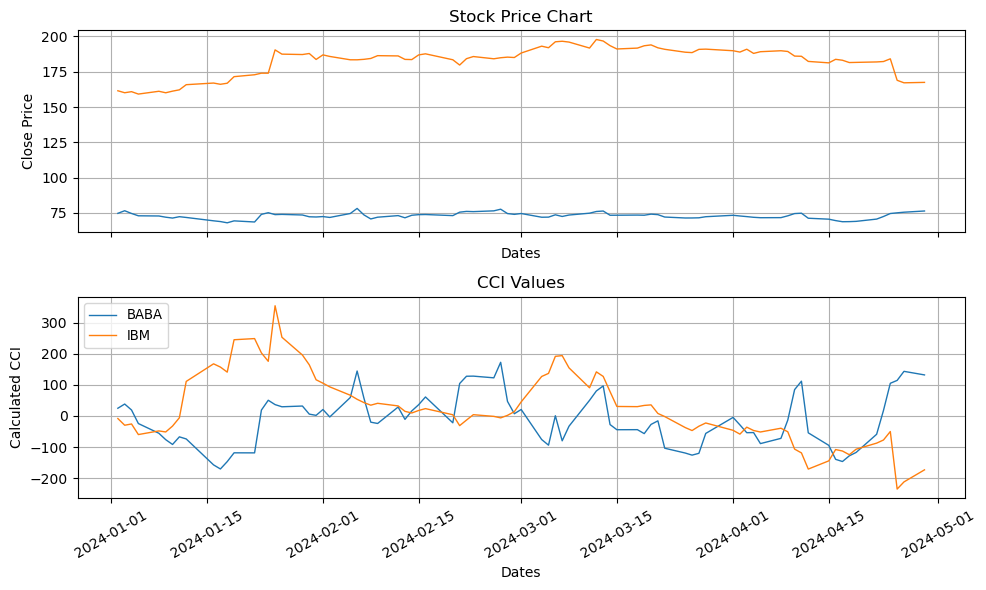

In [51]:
### Plot CCI for chosen ticker
# Create a list of tickers you want to plot
tickers_to_plot = ['BABA', 'IBM']
stock_data_to_plot = import_stock_data(tickers_to_plot, start_date)
cci_df_to_plot, cci_vals = calculate_cci(stock_data_to_plot, window = 20)

# Call plot_function with the correct arguments
plot = plot_function(stock_data_to_plot, cci_df_to_plot, tickers = tickers_to_plot, indicator_type = 'CCI')
plot